In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import random
from IPython import display
%matplotlib inline
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
pd.options.display.float_format = '{:20,.3f}'.format

In [8]:
env = gym.make('FrozenLake-v0')

[2017-03-27 18:29:46,226] Making new env: FrozenLake-v0


In [9]:
# location = '/tmp/FrozenLake-experiment-1'
# env_Monitor = wrappers.Monitor(env, location,force=True)

[2017-03-27 18:29:47,713] Clearing 28 monitor files from previous run (because force=True was provided)


In [10]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
gamma = 0.99
weight = 0.90
rList = []
vList = []
avgRList = []

beta = (1.0-gamma)**(-4)
beta

99999999.99999964

In [18]:
episodeMax = 1000
avgR = 0

for episode in range(episodeMax):
    state = env.reset()
    done = False
    while (not done):
        statePre = state
        
        a = np.argmax(Q[state,:]+np.random.randn(1,env.action_space.n)*(1/(1.0+episode)))
        state,reward,done,info = env.step(a)
        display.clear_output(wait=True)
        env.render()
        Q[statePre,a] = (1-weight)*Q[statePre,a]+weight*(reward+gamma*np.max(Q[state,:]))
        if done:
            rList.append(reward)
            vList.append(np.max(Q[0,:]))
            if episode >100:
                avgR = sum(rList[-100:])/100
                avgRList.append(avgR)
            

  (Left)
SFFF
FHFH
FFFH
HFFG


7422
0.79


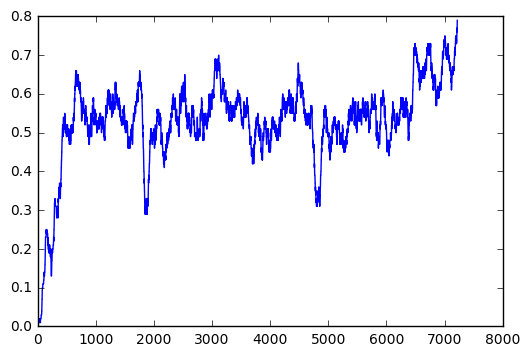

In [12]:
print(sum(rList[-100:])/100)
        
plt.plot(avgRList)

In [13]:
Q

array([[0.6626, 0.0220, 0.0159, 0.0035],
       [0.0073, 0.0070, 0.0008, 0.2630],
       [0.0022, 0.0117, 0.0119, 0.7609],
       [0.0000, 0.0240, 0.0001, 0.3469],
       [0.7607, 0.0000, 0.0056, 0.0001],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0009, 0.0009, 0.0476],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [0.0001, 0.0005, 0.0000, 0.9299],
       [0.0013, 0.8605, 0.0019, 0.0003],
       [0.8825, 0.0008, 0.0001, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [0.0009, 0.0009, 0.9662, 0.0009],
       [0.0000, 0.9988, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000]])

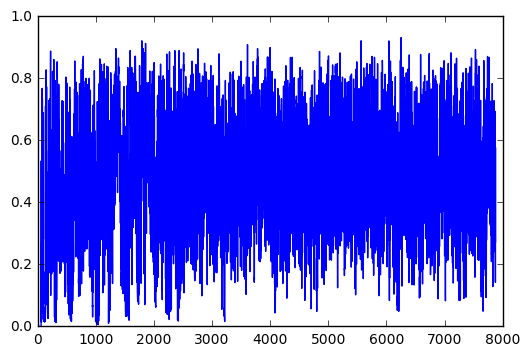

In [60]:
plt.plot(vList)